#### Finding popular / unpopular keywords

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

In [2]:
df_in = pd.read_excel( '../data/input/OnlineNewsPopularity.xlsx')[["Id", " shares"]]
df_in["shares"] = df_in[" shares"]
df_in = df_in.drop( columns=[" shares"], axis=1)

print( (df_in.shares>9500).astype(int).sum())
df_in.shares[ df_in.shares > 9500] = 9500
print( (df_in.shares>9500).astype(int).sum())

df_in.shape

384
0


(7795, 2)

In [3]:
df_keywords = pd.read_excel( '../data/output/2_keywords_list.xlsx')
df_keywords.shape

(7795, 2)

#### For each keyword, get the following
* Average shares
* Number of articles it appears
* Min number of shares it received
* Max number of shares it received

In [4]:
df_popular = pd.DataFrame( columns=["keyword", "shares", "article_count", "min_shares", "max_shares"])
df_popular.set_index( "keyword", inplace=True)
df_popular = df_popular.astype({'shares':int, 'article_count':int, 'min_shares':int, 'max_shares':int}) 
df_popular

,shares,article_count,min_shares,max_shares
keyword,,,,


In [5]:
for index, row in df_keywords.iterrows():
    id = row.Id
    keywords = row.keywords
    shares = df_in.at[index, "shares"]
    
    for keyword in keywords.split(", "):
        if df_popular.index.contains(keyword):
            df_popular.at[keyword, "shares"] += shares
            df_popular.at[keyword, "article_count"] += 1
            
            if shares > df_popular.at[keyword, "max_shares"]:
                df_popular.at[keyword, "max_shares"] = shares
                
            if shares < df_popular.at[keyword, "min_shares"]:
                df_popular.at[keyword, "min_shares"] = shares
        else:
            df_popular.at[keyword, "shares"] = shares
            df_popular.at[keyword, "article_count"] = 1
            df_popular.at[keyword, "min_shares"] = shares
            df_popular.at[keyword, "max_shares"] = shares

df_popular.shape

(6106, 4)

In [6]:
(df_popular["article_count"] > 1).astype(int).sum()

2539

### Find the maximum values

In [7]:
df_popular["avg_shares"] = ( df_popular["shares"] / df_popular["article_count"]).astype(int)
df_popular.head(5)

,shares,article_count,min_shares,max_shares,avg_shares
keyword,,,,,
north-korea,99910.0,46.0,582.0,9500.0,2171
uncategorized,17320868.0,7787.0,5.0,9500.0,2224
us-world,5176343.0,2374.0,22.0,9500.0,2180
world,3373012.0,1516.0,28.0,9500.0,2224
detainees,1758.0,2.0,658.0,1100.0,879


In [8]:
df_most_popular = df_popular.sort_values( "avg_shares", ascending=False)
df_most_popular.head(20)

,shares,article_count,min_shares,max_shares,avg_shares
keyword,,,,,
troops,9500.0,1.0,9500.0,9500.0,9500
candy-crush,9500.0,1.0,9500.0,9500.0,9500
wickr,9500.0,1.0,9500.0,9500.0,9500
forecast,9500.0,1.0,9500.0,9500.0,9500
weather-forecasting,9500.0,1.0,9500.0,9500.0,9500
computer-model,9500.0,1.0,9500.0,9500.0,9500
conflict-free-minerals,9500.0,1.0,9500.0,9500.0,9500
conflict-minerals,9500.0,1.0,9500.0,9500.0,9500
taxi,9500.0,1.0,9500.0,9500.0,9500


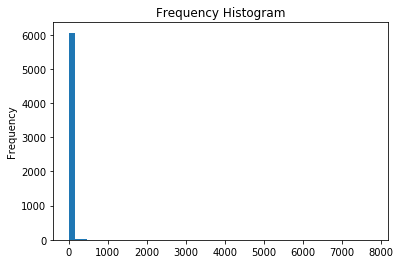

In [9]:
nparr = np.array( df_most_popular["article_count"].values.tolist())
plt.hist(nparr, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [10]:
df_most_popular = df_popular[ df_popular.avg_shares != 25000].sort_values( "avg_shares", ascending=False)
df_most_popular.head(10)

,shares,article_count,min_shares,max_shares,avg_shares
keyword,,,,,
troops,9500.0,1.0,9500.0,9500.0,9500
candy-crush,9500.0,1.0,9500.0,9500.0,9500
wickr,9500.0,1.0,9500.0,9500.0,9500
forecast,9500.0,1.0,9500.0,9500.0,9500
weather-forecasting,9500.0,1.0,9500.0,9500.0,9500
computer-model,9500.0,1.0,9500.0,9500.0,9500
conflict-free-minerals,9500.0,1.0,9500.0,9500.0,9500
conflict-minerals,9500.0,1.0,9500.0,9500.0,9500
taxi,9500.0,1.0,9500.0,9500.0,9500


In [11]:
df_most_popular = df_popular.sort_values( "article_count", ascending=True)
df_most_popular.tail()

,shares,article_count,min_shares,max_shares,avg_shares
keyword,,,,,
world,3373012.0,1516.0,28.0,9500.0,2224
watercooler,3579450.0,1596.0,42.0,9500.0,2242
entertainment,3549153.0,1608.0,5.0,9500.0,2207
us-world,5176343.0,2374.0,22.0,9500.0,2180
uncategorized,17320868.0,7787.0,5.0,9500.0,2224


In [12]:
df_popular.groupby( ["article_count"]).count().head()

,shares,min_shares,max_shares,avg_shares
article_count,,,,
1.0,3567,3567,3567,3567
2.0,904,904,904,904
3.0,430,430,430,430
4.0,232,232,232,232
5.0,174,174,174,174


### From discussion 
1. ignore the top n% and bottom n% and take the top and bottom in the remaining
2. Find min share and max share for each keyword
3. Take the combination of pair of keywords - see the popularity (high / low)
4. Get the infer function, takes input of keywords and gives out the avg, max and min shares

### Keywords to ignore

* Max used keywords - anything > 2000 articles
    * uncategorized appears in almost all the entries
    * us-world appears in almost two thirds of the entries
* Anything appeared in lesser than or equal of 3 articles 

###### We will consider only the keywords which appeared in atleast 4 articles and atmost 2000 articles

In [13]:
df_popular = df_popular[ (df_popular.article_count < 2000) & (df_popular.article_count > 3) ]
df_popular.shape

(1203, 5)

In [14]:
df_popular.drop( columns=["shares"], inplace=True)
df_popular.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1203, 4)

In [15]:
df_popular.to_excel('../data/output/2_keywords_popularity.xlsx', index=True)

### Predicting shares based on keywords popularity

In [16]:
from KeywordsPopularity import KeyPop
keyPop = KeyPop()

In [17]:
# Training RMSE
df_in = pd.read_excel( '../data/input/OnlineNewsPopularity.xlsx')[["Id", " shares"]]
df_in["shares"] = df_in[" shares"]
df_in = df_in.drop( columns=[" shares"], axis=1)
df_in.shares[ df_in.shares > 9500] = 9500

df_keywords = pd.read_excel( '../data/output/2_keywords_list.xlsx')

In [18]:
df_merged = df_in.merge( df_keywords)
df_merged.head()

,Id,shares,keywords
0,1,1100,"north-korea, uncategorized, us-world, world, d..."
1,2,1100,"apple, visa, mobile-payments, american-express..."
2,3,1000,"australia, uncategorized, us-world, sports, ma..."
3,4,822,"australia, bmw, uncategorized, us-world, tony-..."
4,5,841,"q-a, australia, uncategorized, tv, us-world, j..."


In [19]:
total_squared_error = 0.0

df_out = pd.DataFrame(columns=["Id", "keyword_predicted_shares"])
df_out.astype({'Id':int, 'keyword_predicted_shares':int})

for index, row in df_merged.iterrows():
    shares = row.shares
    keywords = row.keywords
    
    predicted_shares = keyPop.predict_shares(keywords)
    
    df_out.at[index, "Id"] = row.Id
    df_out.at[index, "keyword_predicted_shares"] = predicted_shares
    
    total_squared_error += abs( predicted_shares - shares ) ** 2
    
mean_squared_error = total_squared_error / df_merged.shape[0]
rmse = math.sqrt( mean_squared_error)

df_out.to_excel('../data/output/2_keywords_popularity_prediction.xlsx', index=False)

print( rmse)

2244.1339575085763


### [Kannan]: calculating additional columns related to keywords

In [6]:
df_stats=pd.read_excel('../data/output/2_keywords_popularity.xlsx')
df_stats.drop(['article_count'],axis=1,inplace=True)
df_stats.head()

,keyword,min_shares,max_shares,avg_shares
0,north-korea,582,9500,2171
1,world,28,9500,2224
2,apple,43,9500,2219
3,mobile-payments,613,9500,2119
4,mastercard,859,9500,2971


In [15]:
df_stats.shape

(1203, 4)

In [7]:
df_kw=pd.read_excel('../data/output/2_keywords_list.xlsx')
df_kw.head()

,Id,keywords
0,1,"north-korea, uncategorized, us-world, world, d..."
1,2,"apple, visa, mobile-payments, american-express..."
2,3,"australia, uncategorized, us-world, sports, ma..."
3,4,"australia, bmw, uncategorized, us-world, tony-..."
4,5,"q-a, australia, uncategorized, tv, us-world, j..."


In [5]:
df_kw.loc[0,'keywords']

'north-korea, uncategorized, us-world, world, detainees, matthew-miller, jeffrey-fowle'

In [14]:
kws=df_kw.loc[0,'keywords']
list_kw=kws.split(',')
for kw in list_kw:
    kw=kw.strip()
    stats=df_stats[df_stats.keyword==kw]
    print(kw,stats)

north-korea        keyword  min_shares  max_shares  avg_shares
0  north-korea         582        9500        2171
uncategorized Empty DataFrame
Columns: [keyword, min_shares, max_shares, avg_shares]
Index: []
us-world Empty DataFrame
Columns: [keyword, min_shares, max_shares, avg_shares]
Index: []
world   keyword  min_shares  max_shares  avg_shares
1   world          28        9500        2224
detainees Empty DataFrame
Columns: [keyword, min_shares, max_shares, avg_shares]
Index: []
matthew-miller Empty DataFrame
Columns: [keyword, min_shares, max_shares, avg_shares]
Index: []
jeffrey-fowle Empty DataFrame
Columns: [keyword, min_shares, max_shares, avg_shares]
Index: []
